In [ ]:
# Implement  the K-NN Algorithm for classification or regression.
# Apply K-NN Algorithm on the given dataset & predict the class or value for test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('C:\AI Practical\diabetes.csv')
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\DELL\AppData\Local\Temp\ipykernel_7856\3648396039.py:1: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv('C:\AI Practical\diabetes.csv')


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
x = df.drop('Outcome',axis = 1).values
y = df['Outcome'].values

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

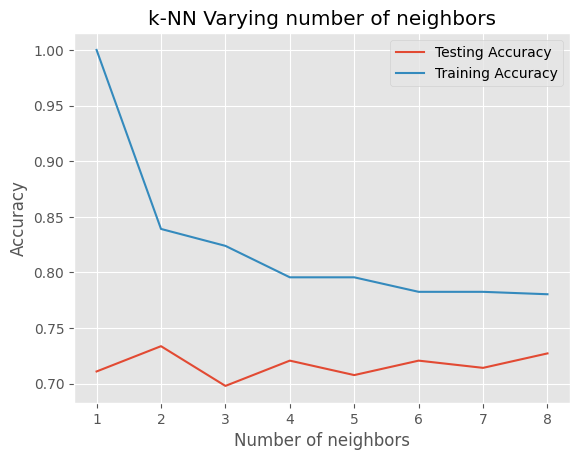

In [9]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [10]:
knn = KNeighborsClassifier(n_neighbors=7)

In [11]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [12]:
knn.score(x_test, y_test)

0.7142857142857143

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_pred = knn.predict(x_test)

In [15]:
confusion_matrix(y_test,y_pred)

array([[163,  43],
       [ 45,  57]])

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       206
           1       0.57      0.56      0.56       102

    accuracy                           0.71       308
   macro avg       0.68      0.68      0.68       308
weighted avg       0.71      0.71      0.71       308



In [18]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [20]:
from sklearn.metrics import roc_curve

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

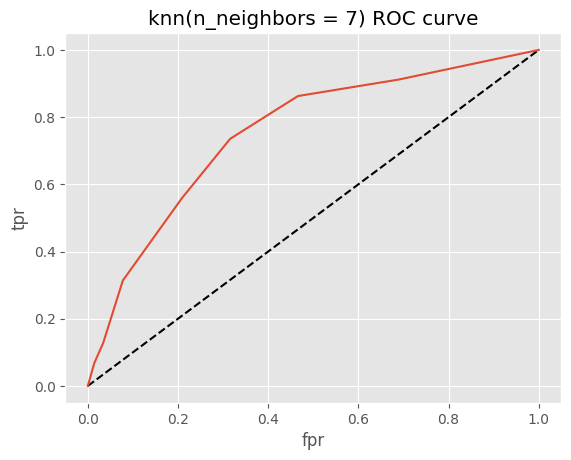

In [22]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors = 7) ROC curve')
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

np.float64(0.7536645726251665)

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
param_grid = {'n_neighbors': np.arange(1,50)}

In [26]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 5)
knn_cv.fit(x,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [27]:
knn_cv.best_score_

np.float64(0.7578558696205755)

In [28]:
knn_cv.best_params_

{'n_neighbors': np.int64(14)}

In [ ]:
# K-Nearest Neighbors (K-NN) is a simple, non-parametric algorithm used for both classification and regression. It classifies data points based on the majority vote of their nearest neighbors or predicts the average value of the nearest neighbors in regression.